# Requirements (only to approach that works)
```
pip install satellite-weather-downloader geopandas shapely
```
shapefiles: https://mega.nz/folder/eERmDCwJ#C_A6WxEPJykJw-mdqbTyrQ

a copernicus account: https://cds.climate.copernicus.eu/user/register

a netcdf4 dataset with brazil boundaries: 
```
import satellite_downloader as sat
file = sat.download_br_netcdf()
ds = sat.load_dataset(file)
```

# First attempt with Fiona

In [381]:
import fiona
import xarray as xr
from shapely import MultiPolygon
import satellite_weather as sat

In [382]:
r = fiona.open('/home/luabida/Documents/malhas/areas_dsei/areas_dsei.shp', encoding='iso-8859-2')

In [383]:
first = r.next()

/tmp/ipykernel_22197/4152706422.py:1: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  first = r.next()


In [384]:
first.geometry.coordinates[0][:50]

[(-64.41927542399998, -7.658039196999937),
 (-64.41877142399994, -7.658368666999934),
 (-64.41823888099998, -7.658835220999947),
 (-64.41802681399997, -7.659801393999942),
 (-64.41740208499994, -7.6609464939999725),
 (-64.41705222499996, -7.662209632999975),
 (-64.41721722799997, -7.663024431999929),
 (-64.41675389899996, -7.663355854999963),
 (-64.41659074999995, -7.664098387999957),
 (-64.41666405399997, -7.664870877999931),
 (-64.41606075499993, -7.66541032799995),
 (-64.41584838099993, -7.66599384999995),
 (-64.41566340699995, -7.666585617999942),
 (-64.41601751799993, -7.666977637999935),
 (-64.41609117499996, -7.667057979999981),
 (-64.41601562499994, -7.6672363279999445),
 (-64.41388519899994, -7.6698179029999665),
 (-64.41324308899993, -7.670301011999925),
 (-64.41233402199998, -7.670936769999969),
 (-64.41191864199993, -7.671738732999927),
 (-64.41100094899997, -7.67239250199998),
 (-64.41108582199996, -7.673210089999941),
 (-64.41082763699995, -7.67352294899996),
 (-64.410378

In [385]:
ds = sat.load_dataset('/home/luabida/copernicus_data/BR_20230123.nc')

In [386]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 168, latitude: 158, time: 8)
Coordinates:
  * longitude  (longitude) float32 -74.0 -73.75 -73.5 ... -32.75 -32.5 -32.25
  * latitude   (latitude) float32 5.5 5.25 5.0 4.75 ... -33.25 -33.5 -33.75
  * time       (time) datetime64[ns] 2023-01-23 ... 2023-01-23T21:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-31 17:58:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

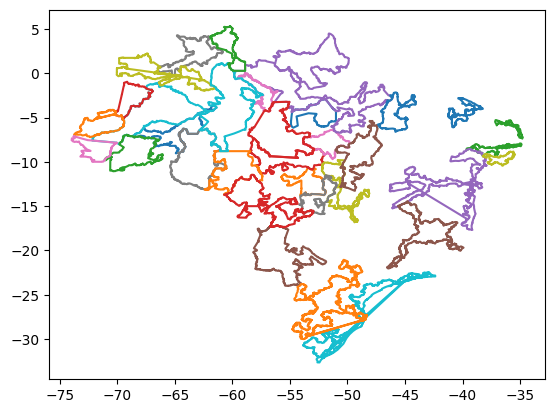

In [387]:
# Check for Polygons consistency

import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("/home/luabida/Documents/malhas/areas_dsei/areas_dsei.shp")
sf.encoding = 'iso-8859-2'
plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

----

In [229]:
from matplotlib.path import Path
import numpy as np

In [284]:
multiPol = first.geometry.coordinates[0]

In [282]:
x, y = np.meshgrid(ds.longitude, ds.latitude) # make a canvas with coordinates
x, y = x.flatten(), y.flatten()
grid = np.vstack((x,y)).T 

In [302]:
grid # np.arange(-74.0, -32.5, 0.25), np.arange(5.5, -33.5, 0.25)

array([[-74.  ,   5.5 ],
       [-73.75,   5.5 ],
       [-73.5 ,   5.5 ],
       ...,
       [-32.75, -33.75],
       [-32.5 , -33.75],
       [-32.25, -33.75]], dtype=float32)

In [304]:
multiPol[:5]

[(-64.41927542399998, -7.658039196999937),
 (-64.41877142399994, -7.658368666999934),
 (-64.41823888099998, -7.658835220999947),
 (-64.41802681399997, -7.659801393999942),
 (-64.41740208499994, -7.6609464939999725)]

In [391]:
# make a polygon
p = Path(multiPol) 
p_filter = p.contains_points(grid)

In [389]:
grid[p_filter].T

array([[-61.75, -61.5 , -61.75, -62.25, -62.  , -62.75, -62.5 , -63.  ,
        -63.25, -63.  , -63.75, -63.5 , -63.25, -63.  , -64.25, -64.  ,
        -63.75, -63.5 , -63.25, -63.  , -62.75, -64.5 , -64.25, -64.  ,
        -63.75, -63.5 , -63.25, -63.  , -62.75, -64.75, -64.5 , -64.25,
        -64.  , -63.75, -63.5 , -63.25, -63.  , -62.75, -67.75, -65.25,
        -65.  , -64.75, -64.5 , -64.25, -64.  , -63.75, -63.5 , -63.25,
        -63.  , -62.75, -67.75, -67.5 , -65.25, -65.  , -64.75, -64.5 ,
        -63.75, -63.5 , -63.25, -63.  , -68.  , -67.75, -67.5 , -67.25,
        -67.  , -66.75, -66.5 , -66.25, -65.75, -65.5 , -65.25, -65.  ,
        -64.75, -63.75, -63.5 , -63.25, -63.  , -68.5 , -68.25, -68.  ,
        -67.75, -67.5 , -67.25, -67.  , -66.75, -66.5 , -66.25, -66.  ,
        -65.75, -65.5 , -65.25, -65.  , -64.75, -68.5 , -67.5 , -67.25,
        -67.  , -66.25, -66.  , -65.75, -65.5 , -65.25, -65.  , -64.75,
        -66.25, -66.  , -65.75, -65.5 , -65.25, -65.  , -64.75, 

----

In [348]:
# Trying with geopandas 
import geopandas
from shapely.geometry import mapping
from shapely.geometry import Point

dsei = geopandas.read_file('/home/luabida/Documents/malhas/areas_dsei/areas_dsei.shp', encoding='iso-8859-2', crs="epsg:4326")
dsei.geometry.apply(mapping)

0     {'type': 'Polygon', 'coordinates': (((-64.4192...
1     {'type': 'Polygon', 'coordinates': (((-53.0992...
2     {'type': 'Polygon', 'coordinates': (((-36.8731...
3     {'type': 'Polygon', 'coordinates': (((-56.7155...
4     {'type': 'MultiPolygon', 'coordinates': [(((-4...
5     {'type': 'Polygon', 'coordinates': (((-42.2089...
6     {'type': 'Polygon', 'coordinates': (((-50.4927...
7     {'type': 'Polygon', 'coordinates': (((-62.0503...
8     {'type': 'Polygon', 'coordinates': (((-36.6333...
9     {'type': 'Polygon', 'coordinates': (((-69.4906...
10    {'type': 'Polygon', 'coordinates': (((-51.9079...
11    {'type': 'Polygon', 'coordinates': (((-59.8303...
12    {'type': 'Polygon', 'coordinates': (((-69.6134...
13    {'type': 'Polygon', 'coordinates': (((-70.1002...
14    {'type': 'Polygon', 'coordinates': (((-48.9999...
15    {'type': 'Polygon', 'coordinates': (((-52.5529...
16    {'type': 'Polygon', 'coordinates': (((-56.5966...
17    {'type': 'Polygon', 'coordinates': (((-63.

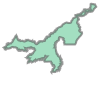

In [358]:
dsei.geometry[0] # nice :)

In [342]:
contains = lambda p, poly: True if poly.contains(p) else False

In [355]:
area = np.array([contains(Point(p), dsei.geometry[0]) for p in grid])

In [366]:
lons, lats = grid[area].T

In [367]:
ds.sel(latitude=lats, longitude=lons)

<xarray.Dataset>
Dimensions:      (longitude: 138, latitude: 138, time: 8)
Coordinates:
  * longitude    (longitude) float32 -61.75 -61.5 -61.75 ... -64.75 -64.5 -64.75
  * latitude     (latitude) float32 -3.75 -3.75 -4.0 -4.25 ... -8.75 -8.75 -9.0
  * time         (time) datetime64[ns] 2023-01-23 ... 2023-01-23T21:00:00
    spatial_ref  int64 0
Data variables:
    t2m          (time, latitude, longitude) float32 ...
    tp           (time, latitude, longitude) float32 ...
    d2m          (time, latitude, longitude) float32 ...
    msl          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-31 17:58:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [399]:
%%timeit
import satellite_weather as sat
import geopandas
import numpy as np
from shapely.geometry import mapping
from shapely.geometry import Point

ds = sat.load_dataset('/home/luabida/copernicus_data/BR_20230123.nc')
dsei = geopandas.read_file('/home/luabida/Documents/malhas/areas_dsei/areas_dsei.shp', encoding='iso-8859-2', crs="epsg:4326")
dsei.geometry.apply(mapping)
contains = lambda p, poly: True if poly.contains(p) else False
area = np.array([contains(Point(p), dsei.geometry[0]) for p in grid])
ds.sel(latitude=lats, longitude=lons)

2.83 s ± 77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [401]:
%%timeit
import satellite_weather as sat
import fiona
import xarray as xr
from shapely import MultiPolygon

r = fiona.open('/home/luabida/Documents/malhas/areas_dsei/areas_dsei.shp', encoding='iso-8859-2')
first = r.next()

ds = sat.load_dataset('/home/luabida/copernicus_data/BR_20230123.nc')

multiPol = first.geometry.coordinates[0]
p = Path(multiPol)
p_filter = p.contains_points(grid)
lons, lats = grid[p_filter].T
ds.sel(latitude=lats, longitude=lons)

<magic-timeit>:7: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
<magic-timeit>:7: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
<magic-timeit>:7: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
<magic-timeit>:7: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
<magic-timeit>:7: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
<magic-timeit>:7: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
<magic-timeit>:7: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collect

879 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
